# Introduction to Python and Jupyter Notebooks 

In [3]:
print('Hello World! ')

Hello World! 


**Jupyter Notebooks**

This document is called a Jupyter Notebook. It's a convenient way to interact with data within a Python envirnonment. Here is a good [tutorial](https://realpython.com/jupyter-notebook-introduction/) all about notebooks.

Each "cell" can contain either text or code that we wish to execute. You can select the type of cell in the pull-down menu above.

To execute a code cell, hit "Shift+Enter".

To see a list of commands, click the Help pull-down menu above.


## Import required libraries

Python allows users to import libraries containing various functions. The syntax for this is:

```python
import library_name
from library_name import function
```

Python has a number of powerful libraries for handling data. The most commonly used modules are called `numpy`, `pandas`, and `matplotlib`.


**numpy**

[numpy](https://www.numpy.org) is a powerful library geared to numerical analysis of arrays of data. 

**pandas**

[Pandas](https://pandas.pydata.org) is a data-oriented library based around a set of core data structures. The main structure is called a `DataFrame`, which is a 2D tabular-like structure. 

There are very simple tools to read in common data formats into Pandas. In this lab we will use the `pd.read_csv` function to load data from a text file.

**matplotlib**

We will use [matplotlib](https://matplotlib.org) to plot and display the data and the fit results. We will load the `pyplot` submodule which provides key plotting tools for us. 


# Simulating electron - proton collisions 

## Day-1 : Introduction and first run
We will first initialize our simulation toolkit - PYTHIA (pythia.org) and run a few collisions of electrons and protons at varying energies and begin to study the output  

In [1]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [2]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")

True

In [3]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [4]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [5]:
#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()

True

In [6]:
pythia.next()

part_pt = []
part_eta = []
part_theta = []
part_phi = []
part_E = []
part_p = []
part_m = []
part_id = []

for particle in pythia.event:
    if particle.isFinal():
        pT = float('%.3g' % particle.pT())
        part_pt.append(pT)
        eta = float('%.3g' % particle.eta())
        part_eta.append(eta)
        theta = float('%.3g' % particle.theta())
        part_theta.append(theta)
        phi = float('%.3g' % particle.phi())
        part_phi.append(phi)
        E = float('%.3g' % particle.e())
        part_E.append(E)
        p = float('%.3g' % particle.pAbs())
        part_p.append(p)
        mass = float('%.3g' % particle.m())
        part_m.append(mass)
        part_id.append(particle.id())
        print(particle.id(), pT, eta, theta, phi, E, p, mass)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_theta = np.array(part_theta)
part_E = np.array(part_E)
part_p = np.array(part_p)
part_m = np.array(part_m)
part_id = np.array(part_id)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m)).T

11 8.64 -4.69 3.12 0.884 470.0 470.0 0.000511
211 0.163 5.8 0.00603 -1.97 27.1 27.1 0.14
-211 0.527 7.69 0.000913 2.27 577.0 577.0 0.14
211 0.388 6.48 0.00308 0.942 126.0 126.0 0.14
-211 0.267 5.79 0.00612 0.626 43.7 43.7 0.14
211 0.712 4.36 0.0255 -0.978 27.9 27.9 0.14
-211 0.187 4.38 0.025 1.35 7.47 7.47 0.14
211 0.21 4.25 0.0285 0.571 7.35 7.35 0.14
-211 0.531 -1.05 2.47 -0.9 0.86 0.849 0.14
211 0.346 0.0678 1.5 -0.301 0.374 0.347 0.14
-211 2.42 -1.9 2.85 -2.09 8.28 8.28 0.14
321 6.31 -1.84 2.83 -2.25 20.4 20.4 0.494
211 0.235 4.04 0.0353 -0.00341 6.66 6.66 0.14
-211 0.469 3.67 0.051 -3.14 9.21 9.21 0.14
2112 0.23 3.2 0.0811 1.29 2.99 2.83 0.94
-2212 0.441 1.12 0.631 -2.63 1.2 0.747 0.938
211 0.243 0.821 0.829 2.01 0.358 0.33 0.14
2212 0.52 5.59 0.00746 1.11 69.6 69.6 0.938
-211 0.132 5.11 0.0121 2.13 10.9 10.9 0.14
22 0.477 -0.974 2.42 -2.56 0.722 0.722 0.0
22 0.403 0.176 1.4 -2.86 0.409 0.409 0.0
22 0.267 2.06 0.253 -3.06 1.06 1.06 0.0
22 0.0691 3.01 0.0984 3.1 0.703 0.703 0.0


In [7]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass'])
Event_Particles

,ID,pT,phi,eta,theta,Energy,momentum,mass
0,11.0,8.6400,0.88400,-4.6900,3.120000,470.000,470.000,0.000511
1,211.0,0.1630,-1.97000,5.8000,0.006030,27.100,27.100,0.140000
2,-211.0,0.5270,2.27000,7.6900,0.000913,577.000,577.000,0.140000
3,211.0,0.3880,0.94200,6.4800,0.003080,126.000,126.000,0.140000
4,-211.0,0.2670,0.62600,5.7900,0.006120,43.700,43.700,0.140000
5,211.0,0.7120,-0.97800,4.3600,0.025500,27.900,27.900,0.140000
6,-211.0,0.1870,1.35000,4.3800,0.025000,7.470,7.470,0.140000
7,211.0,0.2100,0.57100,4.2500,0.028500,7.350,7.350,0.140000
8,-211.0,0.5310,-0.90000,-1.0500,2.470000,0.860,0.849,0.140000
9,211.0,0.3460,-0.30100,0.0678,1.500000,0.374,0.347,0.140000


### Lets make some plots! 
Since we have converted the output of the collision into a pandas dataframe - we can easily plot histograms (counters) of objects 

#### plot of the energies of the particles resulting from the collision 

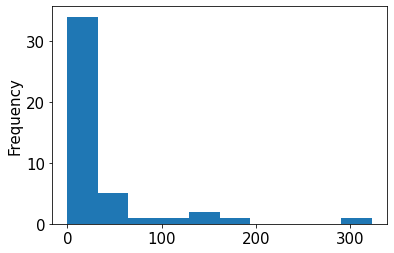

In [114]:
Event_Particles['Energy'].plot.hist()
plt.show()

## Lets have some fun now 
1. Try plotting the other columns in the dataframe 
2. how can we plot the correlation between columns - 
  dataframe.plot(kind='scatter',x='column_A',y='column_B',color='red')
  plt.show()
3. plotting bar charts 
  dataframe.plot(kind='bar',x='column_A',y='column_B')
  plt.show()
3. Lets rerun the simulation and remake the plots 
4. how to plot multiple axes on top of each other 
  ax = plt.gca() [gca stands for 'get current axis']
  dataframe.plot(kind='line',x='column_A',y='column_B',ax=ax)
  dataframe.plot(kind='line',x='column_A',y='column_C', color='red', ax=ax)
  plt.show()
5. Can we see how many particles are produced in each event? 
  dataframe.shape[0] or you can also check the shape of particles array 

